In [173]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [174]:
df=pd.read_csv('Salary project.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [175]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [176]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [177]:
df.tail()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329
396,AsstProf,A,8,4,Male,81035


In [178]:
df.shape

(397, 6)

In [179]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [181]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [182]:
df.isnull().sum().sum()

0

<AxesSubplot:>

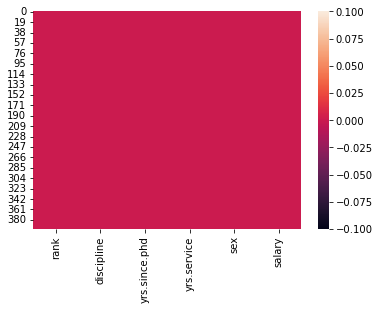

In [183]:
sns.heatmap(df.isnull())

In [184]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


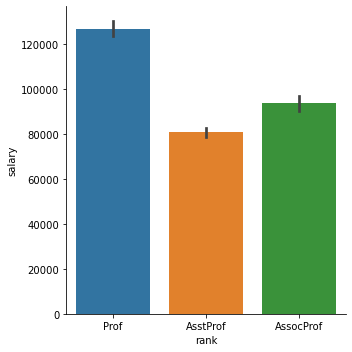

In [185]:
sns.catplot(x="rank", y="salary",kind="bar", data=df)

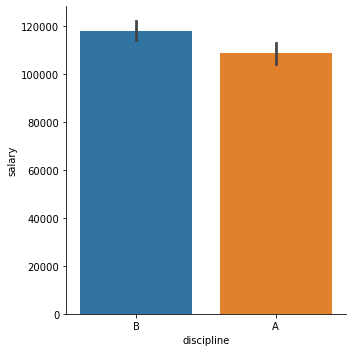

In [186]:
sns.catplot(x="discipline", y="salary",kind="bar", data=df)

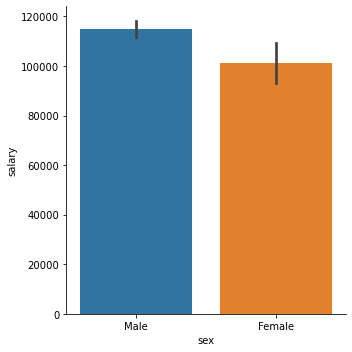

In [187]:
sns.catplot(x="sex", y="salary",kind="bar", data=df)

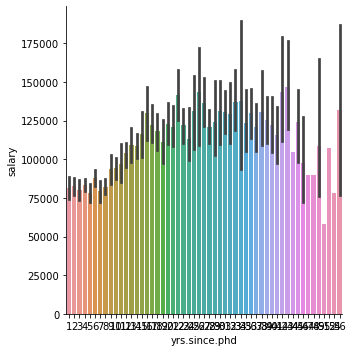

In [188]:
sns.catplot(x="yrs.since.phd", y="salary",kind="bar", data=df)

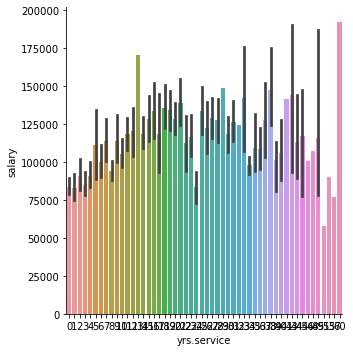

In [189]:
sns.catplot(x="yrs.service", y="salary",kind="bar", data=df)

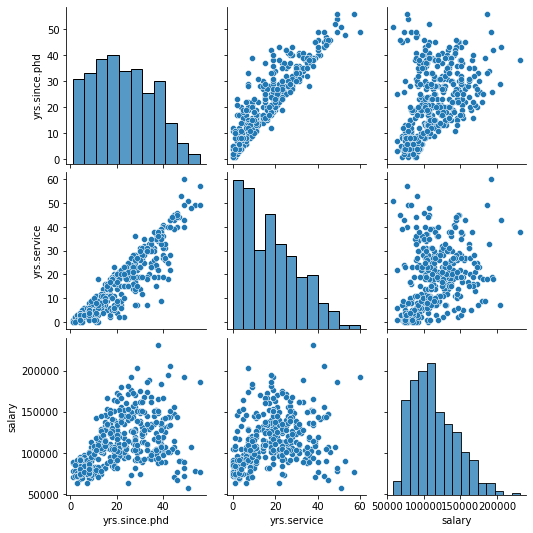

In [190]:
sns.pairplot(df)

In [191]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [192]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [193]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [194]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

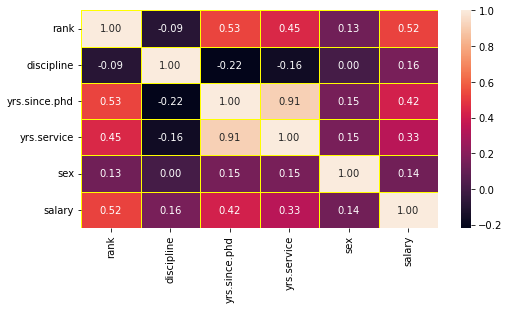

In [195]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='yellow',fmt="0.2f")

In [196]:
df.corr()['salary'].sort_values()

sex              0.138610
discipline       0.156084
yrs.service      0.334745
yrs.since.phd    0.419231
rank             0.522207
salary           1.000000
Name: salary, dtype: float64

In [197]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

In [227]:
collist=df.columns.values
ncol=30
nrows=14

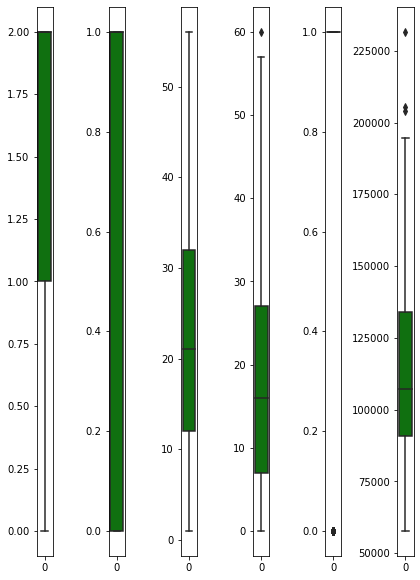

In [228]:
plt.figure(figsize=(ncol,8*nrows))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [229]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
        103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
        230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
        341, 358, 361, 364], dtype=int64),
 array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
       dtype=int64))

In [230]:
df_new=df[(z<3).all(axis=1)]
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [255]:
df=df_new.copy()
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


In [256]:
df.shape

(354, 6)

In [278]:
from sklearn.preprocessing import power_transform

In [279]:
x=power_transform(x,method='yeo-johnson')

In [280]:
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [281]:
x.shape

(354, 5)

In [282]:
x.mean()

7.627294903639493e-17

In [283]:
from sklearn.preprocessing import StandardScaler
# transform my dataset into a standard normal distribution
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.66261867,  0.9133438 , -0.16993349,  0.21391071,  0.        ],
       [ 0.66261867,  0.9133438 , -0.09133723,  0.06567291,  0.        ],
       [-1.18533666,  0.9133438 , -1.64343352, -1.32485378,  0.        ],
       ...,
       [ 0.66261867, -1.09487797,  1.38580057,  0.67335521,  0.        ],
       [ 0.66261867, -1.09487797,  0.28223854, -0.0121133 ,  0.        ],
       [-1.18533666, -1.09487797, -1.16828402, -1.16384273,  0.        ]])

In [284]:
x.mean()

4.014365738757628e-18

In [285]:
x=df.iloc[:,:-1]
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2.0,1.0,19,18,1.0
1,2.0,1.0,20,16,1.0
2,1.0,1.0,4,3,1.0
3,2.0,1.0,45,39,1.0
4,2.0,1.0,40,41,1.0
...,...,...,...,...,...
392,2.0,0.0,33,30,1.0
393,2.0,0.0,31,19,1.0
394,2.0,0.0,42,25,1.0
395,2.0,0.0,25,15,1.0


In [286]:
x.shape

(354, 5)

In [287]:
y=df.iloc[:,-1]
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 354, dtype: int64

In [288]:
y.shape

(354,)

In [289]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [290]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.2)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is: {r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is: {r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is: 0.34580725676637425
At random state0,the testing accuracy is: 0.34217255754527776


At random state1,the training accuracy is: 0.3177281294109646
At random state1,the testing accuracy is: 0.4167670143137431


At random state2,the training accuracy is: 0.34898555638770656
At random state2,the testing accuracy is: 0.3487268227704948


At random state3,the training accuracy is: 0.33778497387739237
At random state3,the testing accuracy is: 0.39167515905108985


At random state4,the training accuracy is: 0.31709990965379276
At random state4,the testing accuracy is: 0.42406836276354576


At random state5,the training accuracy is: 0.33392951900456636
At random state5,the testing accuracy is: 0.4141058387669242


At random state6,the training accuracy is: 0.3329973194212317
At random state6,the testing accuracy is: 0.3689410053981992


At random state7,the training accuracy is: 0.35604831349084975
At random state7,the testing accuracy is: 0.3057890560

In [291]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.20)

In [292]:
lr.fit(x_train,y_train)

LinearRegression()

In [293]:
pred_train=lr.predict(x_train)

In [294]:
pred_test=lr.predict(x_test)

In [295]:
r2_score(y_train,pred_train)

0.3177281294109646

In [296]:
r2_score(y_test,pred_test)

0.4167670143137431

In [297]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

In [298]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cv:-",j)
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")  
    print("\n")

At cv:- 2
At cross fold 2 the cv score is 0.28301428951711716 and accuracy score for training is 0.3177281294109646 and accuracy score for testing is 0.4167670143137431


At cv:- 3
At cross fold 3 the cv score is 0.2862500641263129 and accuracy score for training is 0.3177281294109646 and accuracy score for testing is 0.4167670143137431


At cv:- 4
At cross fold 4 the cv score is 0.28832350186839184 and accuracy score for training is 0.3177281294109646 and accuracy score for testing is 0.4167670143137431


At cv:- 5
At cross fold 5 the cv score is 0.2671985753918659 and accuracy score for training is 0.3177281294109646 and accuracy score for testing is 0.4167670143137431


At cv:- 6
At cross fold 6 the cv score is 0.28639582672723446 and accuracy score for training is 0.3177281294109646 and accuracy score for testing is 0.4167670143137431


At cv:- 7
At cross fold 7 the cv score is 0.29561575041043275 and accuracy score for training is 0.3177281294109646 and accuracy score for testing 

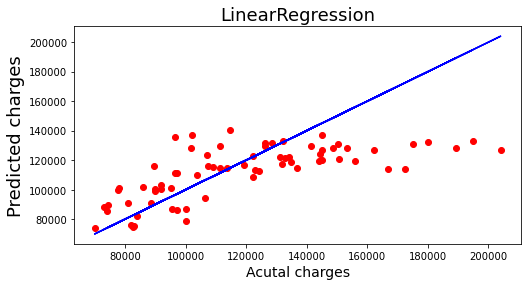

In [299]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Acutal charges',fontsize=14)
plt.ylabel('Predicted charges',fontsize=18)
plt.title('LinearRegression',fontsize=18)
plt.savefig('lr.png')
plt.show()

In [300]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [301]:
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [302]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls_score_training=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print('score of the training models',ls_score_training*100)

score of the training models 31.772812941096472


In [303]:
pred_ls=ls.predict(x_test)

In [304]:
lss=r2_score(y_test,pred_ls)
print('r2 score of the model is',lss*100)

r2 score of the model is 41.67670143563983


In [305]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print("error:")
print('Mean absolute error:', mean_absolute_error(y_test,pred_ls))
print('Mean squared error:', mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred_ls)))

error:
Mean absolute error: 18455.474053430473
Mean squared error: 596762790.3359032
Root Mean Squared Error: 24428.728790829522
